# Introduction to `geoplanar`

Welcome to `geoplanar`, a package for [planar enforcement](https://ibis.geog.ubc.ca/courses/klink/gis.notes/ncgia/u12.html#SEC12.6) for polygon (multipolygon) [GeoSeries/GeoDataFrames](https://github.com/geopandas/geopandas).


In [1]:
import geoplanar
import geopandas
import matplotlib.pyplot as plt
import contextily as ctx

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


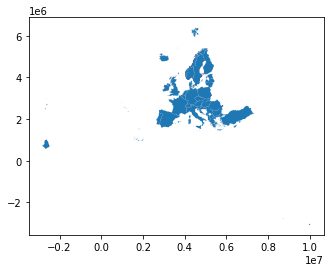

In [3]:
# Data for EU countries retrieved from https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
EU = geopandas.read_file("NUTS_RG_01M_2021_3035_LEVL_0.shp")
EU.plot()

In [4]:
EU.head()


,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ,0,CZ,Česko,Česko,0,None,0,CZ,"POLYGON ((4635755.041 3113254.655, 4636313.459..."
1,DE,0,DE,Deutschland,Deutschland,0,None,0,DE,"MULTIPOLYGON (((4355225.365 2715902.993, 43541..."
2,DK,0,DK,Danmark,Danmark,0,None,0,DK,"MULTIPOLYGON (((4650502.736 3591342.844, 46503..."
3,AL,0,AL,Shqipëria,Shqipëria,0,None,0,AL,"MULTIPOLYGON (((5129579.170 2204098.752, 51298..."
4,CY,0,CY,Kýpros,Κύπρος,0,None,0,CY,"MULTIPOLYGON (((6527040.718 1762367.593, 65267..."


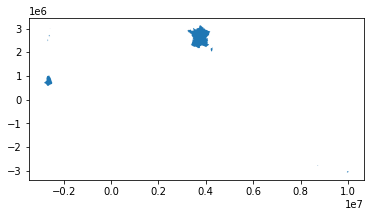

In [5]:
France= EU[EU['NUTS_ID'] == "FR"]
France.plot()

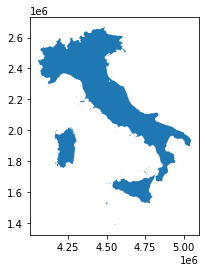

In [6]:
Italy= EU[EU['NUTS_ID'] == "IT"]
Italy.plot()

In [7]:
France.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.579299533, 24.603629139001, 44.820545196533, 84.722623821813)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azi

In [8]:
France = France.to_crs(4326)
Italy = Italy.to_crs(4326)
France.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fra_it = France.append(Italy)

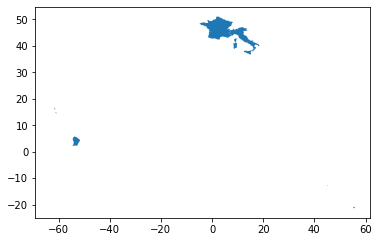

In [10]:
fra_it.plot()


We were able to combined two different countries gdf.

### Subsample of Data for Border

In [12]:
from shapely.geometry import box

clipper = geopandas.GeoDataFrame(geometry =[box(4, 40, 15, 51)])

In [13]:
fraborder = geopandas.clip(clipper, France)
itborder = geopandas.clip(clipper, Italy)

<ipython-input-13-0c337a57e484>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  fraborder = geopandas.clip(clipper, France)
<ipython-input-13-0c337a57e484>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  itborder = geopandas.clip(clipper, Italy)


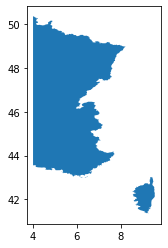

In [14]:
fraborder.plot()

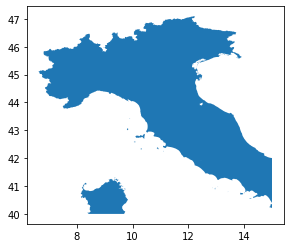

In [15]:
itborder.plot()

In [16]:
fa_it = itborder.append(fraborder)
fa_it.reset_index(inplace=True)
fa_it['COUNTRY'] = ["ITALY", "FRANCE"]
fa_it.area

0    23.985030
1    20.907659
dtype: float64

In [17]:
fa_it= fa_it.set_crs(France.crs)
fa_it.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
%matplotlib inline

import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [19]:
fa_it = fa_it.to_crs(epsg=3857)

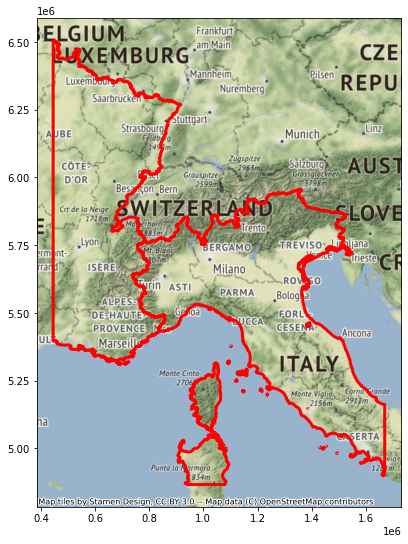

In [20]:

ax = fa_it.plot(figsize=(9,9), color="none", edgecolor="r", linewidth=3)
cx.add_basemap(ax, crs=fa_it.crs.to_string())

### Checking for Border discrepancies

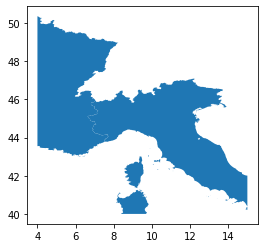

In [21]:
swit= itborder.append(fraborder)
swit.reset_index(inplace=True)
swit.plot()

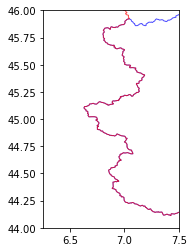

In [30]:
base = itborder.plot(alpha=0.7, facecolor='none', edgecolor='blue')
_ = fraborder.plot(alpha=0.7, facecolor='none', edgecolor='red', ax=base)
_ = base.set_xlim(6.25, 7.5)
_ = base.set_ylim(44, 46)


## Fixing Overlaps/Overshoots

In [34]:
frait= itborder.append(fraborder)
frait.reset_index(inplace=True)
frait['COUNTRY'] = ["ITALY", "FRANCE"]
frait.area

0    23.985030
1    20.907659
dtype: float64

In [35]:
# Checking for overlaps
geoplanar.is_overlapping(frait)

False

In [38]:
# Fixing Overlaps
border_overlaps_removed = geoplanar.trim_overlaps(frait)
border_overlaps_removed.area

0    23.985030
1    20.907659
dtype: float64

## Fixing undershoots/holes

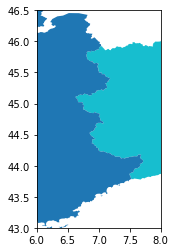

In [39]:
base = border_overlaps_removed.plot(column='COUNTRY')
_ = base.set_xlim(6, 8)
_ = base.set_ylim(43, 46.5)


In [40]:
holes = geoplanar.holes(border_overlaps_removed)

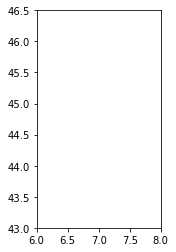

In [41]:
base = holes.plot()
_ = base.set_xlim(6, 8)
_ = base.set_ylim(43, 46.5)



In [42]:
holes.shape

(2, 3)

In [43]:
final = geoplanar.fill_holes(border_overlaps_removed)

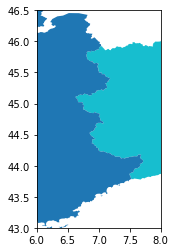

In [44]:
base = final.plot(column='COUNTRY')
_ = base.set_xlim(6, 8)
_ = base.set_ylim(43, 46.5)


In [45]:
h1 = geoplanar.holes(final)

In [46]:
h1.shape 


(0, 3)